<a href="https://colab.research.google.com/github/abi-vishnu0917/DS-Project-part1-2/blob/main/project2parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

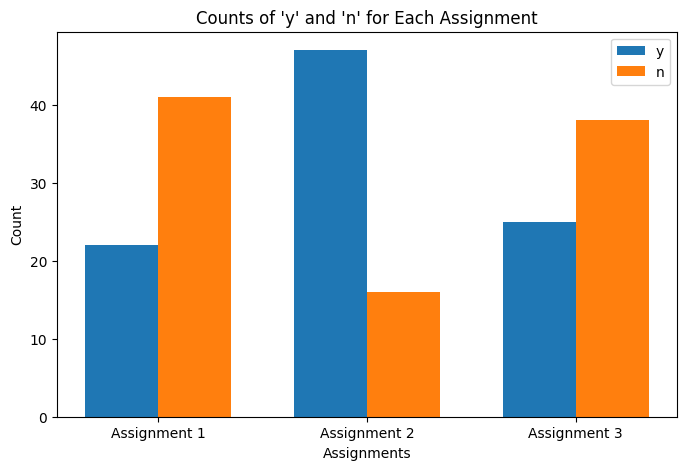

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data (reusing the lists from the previous cell)
assignment_1 = ['y','y','n','n','n','y','n','n','n','n','y','y','n','n','n','n','n','n','y','n','n','n','y','n','n','n','n','n','y','y','n','n','y','n','n','n','y','y','n','n','n','y','n','n','y','n','n','n','n','n','n','y','y','n','n','y','y','n','y','n','y','y','y']
assignment_2 = ['y','y','y','n','n','y','y','y','y','y','y','n','n','n','y','y','n','y','y','n','y','y','y','n','n','y','n','y','y','y','y','y','y','y','y','n','y','y','y','n','y','y','y','y','y','y','n','y','y','n','n','y','y','y','n','y','y','y','y','y','y','y','y']
assignment_3 = ['n','y','n','n','n','n','y','n','n','y','n','n','n','n','n','n','n','y','y','n','y','y','n','n','y','y','y','n','y','y','y','y','n','y','n','y','y','n','y','n','n','n','n','y','n','y','n','y','n','n','n','y','n','n','n','n','n','n','y','n','y','n','y']

assignments = [assignment_1, assignment_2, assignment_3]
assignment_labels = ["Assignment 1", "Assignment 2", "Assignment 3"]

# Calculate counts of 'y' and 'n' for each assignment
y_counts = [assignment.count('y') for assignment in assignments]
n_counts = [assignment.count('n') for assignment in assignments]

# Create side-by-side bar charts
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
indices = np.arange(len(assignments))

bar_y = ax.bar(indices - bar_width/2, y_counts, bar_width, label='y')
bar_n = ax.bar(indices + bar_width/2, n_counts, bar_width, label='n')

ax.set_xlabel("Assignments")
ax.set_ylabel("Count")
ax.set_title("Counts of 'y' and 'n' for Each Assignment")
ax.set_xticks(indices)
ax.set_xticklabels(assignment_labels)
ax.legend()

plt.show()

✅ GIF saved as student_marks.gif


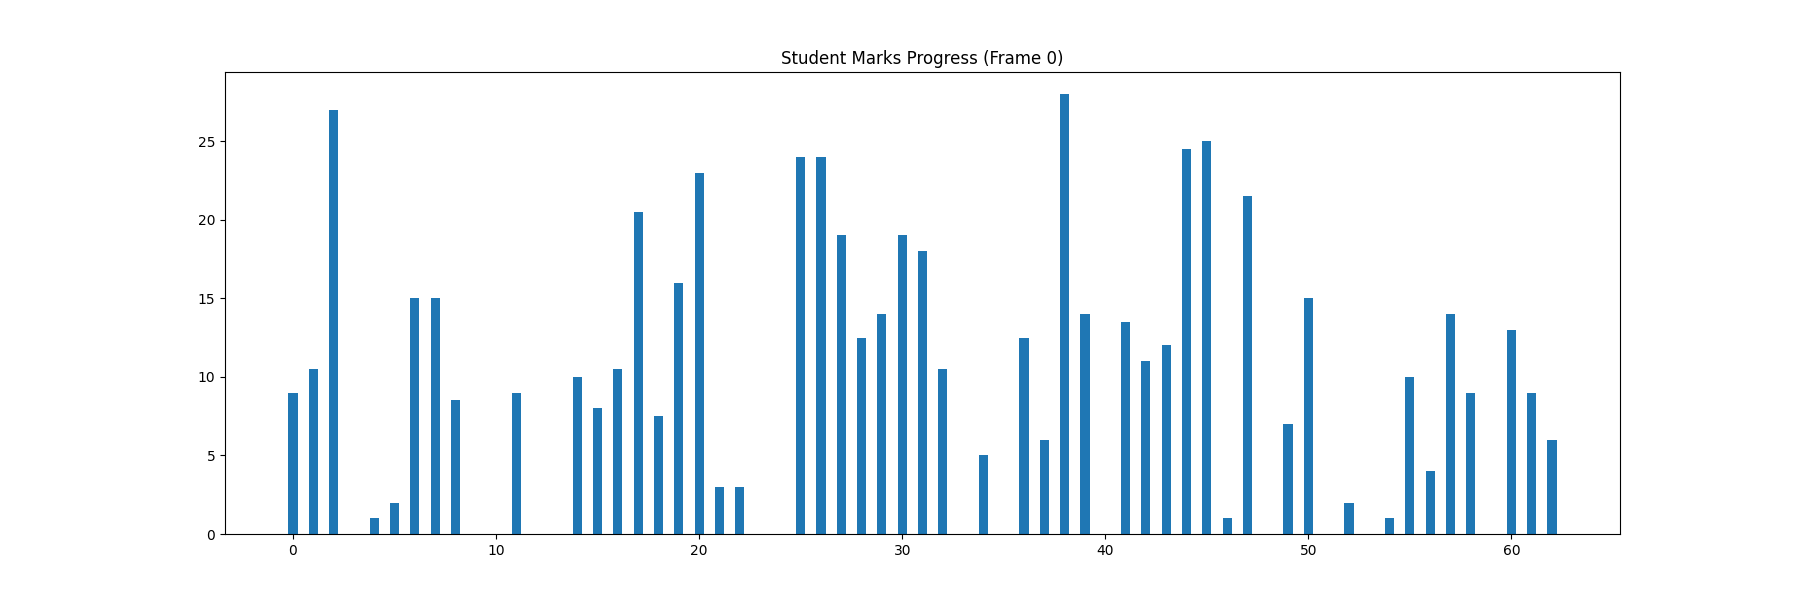

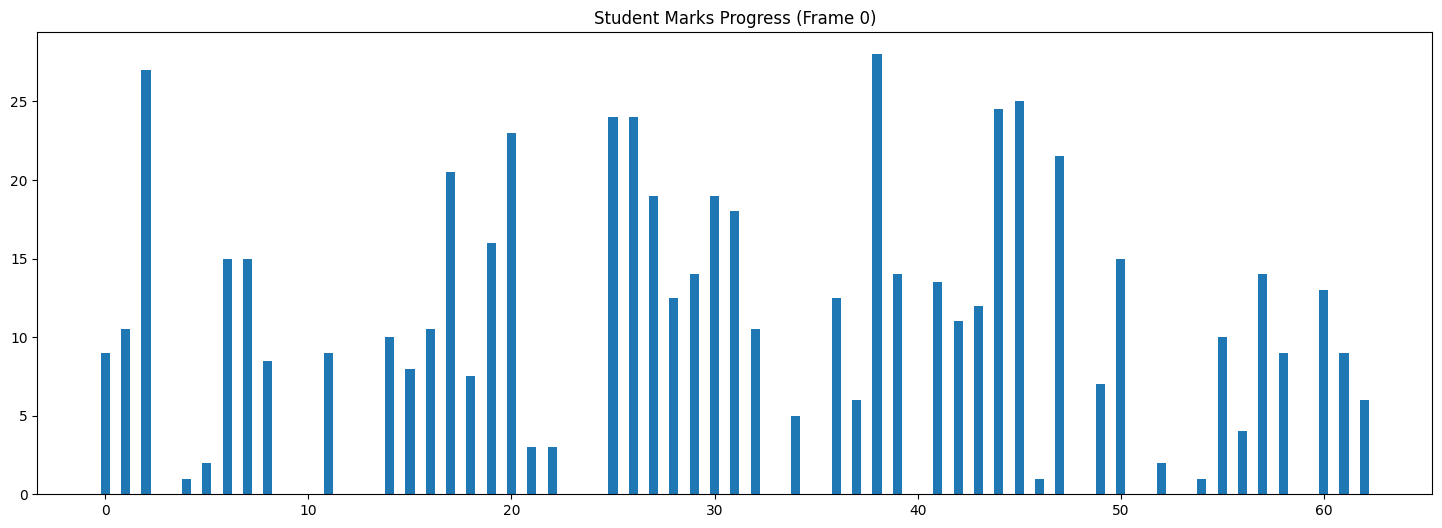

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, Image

# Students S1 to S63
students = [f"S{i}" for i in range(1, 64)]

# Internal marks with 'ab' for absent
test1 = [9,10.5,27,22,1,2,15,15,8.5,22,'ab',9,0,0,10,8,10.5,20.5,7.5,16,23,3,3,'ab',27,24,24,19,12.5,14,19,18,10.5,0,5,'ab',12.5,6,28,14,16.5,13.5,11,12,24.5,25,1,21.5,0,7,15,0,2,0,1,10,4,14,9,0,13,9,6]
test2 = [16,20.5,25.5,'ab',14,12,12,9,15,'ab',8,7,'ab',6,14,8.5,13.5,28,22,3,25,8,12,'ab','ab',9,12,22,18,27,23,17,15,13,16,12,24,13.5,28,12,'ab',16,17,20.5,16,19.5,3,23,13,7.5,12,12,7,0,6,24,9,14,19,0,20,7,13]

# Replace 'ab' with np.nan and convert to numpy arrays for calculation
test1_numeric = np.array([np.nan if x == 'ab' else float(x) for x in test1])
test2_numeric = np.array([np.nan if x == 'ab' else float(x) for x in test2])


x = np.arange(len(students))  # positions
width = 0.45  # slightly bigger bars

fig, ax = plt.subplots(figsize=(18,6))

# Create the initial bars
bars = ax.bar(x, test1_numeric, width, label='Test 1')

def update(frame):
    # Interpolate marks between test1 and test2
    progress = frame / 50 # total frames = 50
    # Use vectorized operations for interpolation
    current_marks = test1_numeric + (test2_numeric - test1_numeric) * progress

    # Update bar heights
    for bar, mark in zip(bars, current_marks):
        bar.set_height(mark)

    ax.set_title(f"Student Marks Progress (Frame {frame})")
    return bars

# --- CREATE ANIMATION ---
ani = FuncAnimation(fig, update, frames=51, interval=100, blit=False)

#Save as a GIF
gif_writer = PillowWriter(fps=20)
ani.save("student_marks.gif", writer=gif_writer)
print("✅ GIF saved as student_marks.gif")
display(Image(filename="student_marks.gif"))